In [1]:
%matplotlib inline
import sys
sys.path.insert(1, '/home/harsh/CourseworkRepo/stic/example')
sys.path.insert(2, '/home/harsh/CourseworkRepo/WFAComparison')
import h5py
import numpy as np
import sunpy.io.fits
from pathlib import Path
from prepare_data import *
from stray_light_approximation import *
import matplotlib.pyplot as plt


base_path = Path(
    '/home/harsh/SpinorNagaraju/'
)

write_path = base_path / 'maps_1/stic'

falc_file_path = Path(
    '/home/harsh/CourseworkRepo/stic/run/falc_nicole_for_stic.nc'
)

catalog_file = '/home/harsh/CourseworkRepo/WFAComparison/catalog_8542.txt'

index = '[18:18+464][::-1]'

wave_ca = np.array(
    [
        8531.96148, 8531.99521, 8532.02894, 8532.06267, 8532.0964 ,
        8532.13013, 8532.16386, 8532.19759, 8532.23132, 8532.26505,
        8532.29878, 8532.33251, 8532.36624, 8532.39997, 8532.4337 ,
        8532.46743, 8532.50116, 8532.53489, 8532.56862, 8532.60235,
        8532.63608, 8532.66981, 8532.70354, 8532.73727, 8532.771  ,
        8532.80473, 8532.83846, 8532.87219, 8532.90592, 8532.93965,
        8532.97338, 8533.00711, 8533.04084, 8533.07457, 8533.1083 ,
        8533.14203, 8533.17576, 8533.20949, 8533.24322, 8533.27695,
        8533.31068, 8533.34441, 8533.37814, 8533.41187, 8533.4456 ,
        8533.47933, 8533.51306, 8533.54679, 8533.58052, 8533.61425,
        8533.64798, 8533.68171, 8533.71544, 8533.74917, 8533.7829 ,
        8533.81663, 8533.85036, 8533.88409, 8533.91782, 8533.95155,
        8533.98528, 8534.01901, 8534.05274, 8534.08647, 8534.1202 ,
        8534.15393, 8534.18766, 8534.22139, 8534.25512, 8534.28885,
        8534.32258, 8534.35631, 8534.39004, 8534.42377, 8534.4575 ,
        8534.49123, 8534.52496, 8534.55869, 8534.59242, 8534.62615,
        8534.65988, 8534.69361, 8534.72734, 8534.76107, 8534.7948 ,
        8534.82853, 8534.86226, 8534.89599, 8534.92972, 8534.96345,
        8534.99718, 8535.03091, 8535.06464, 8535.09837, 8535.1321 ,
        8535.16583, 8535.19956, 8535.23329, 8535.26702, 8535.30075,
        8535.33448, 8535.36821, 8535.40194, 8535.43567, 8535.4694 ,
        8535.50313, 8535.53686, 8535.57059, 8535.60432, 8535.63805,
        8535.67178, 8535.70551, 8535.73924, 8535.77297, 8535.8067 ,
        8535.84043, 8535.87416, 8535.90789, 8535.94162, 8535.97535,
        8536.00908, 8536.04281, 8536.07654, 8536.11027, 8536.144  ,
        8536.17773, 8536.21146, 8536.24519, 8536.27892, 8536.31265,
        8536.34638, 8536.38011, 8536.41384, 8536.44757, 8536.4813 ,
        8536.51503, 8536.54876, 8536.58249, 8536.61622, 8536.64995,
        8536.68368, 8536.71741, 8536.75114, 8536.78487, 8536.8186 ,
        8536.85233, 8536.88606, 8536.91979, 8536.95352, 8536.98725,
        8537.02098, 8537.05471, 8537.08844, 8537.12217, 8537.1559 ,
        8537.18963, 8537.22336, 8537.25709, 8537.29082, 8537.32455,
        8537.35828, 8537.39201, 8537.42574, 8537.45947, 8537.4932 ,
        8537.52693, 8537.56066, 8537.59439, 8537.62812, 8537.66185,
        8537.69558, 8537.72931, 8537.76304, 8537.79677, 8537.8305 ,
        8537.86423, 8537.89796, 8537.93169, 8537.96542, 8537.99915,
        8538.03288, 8538.06661, 8538.10034, 8538.13407, 8538.1678 ,
        8538.20153, 8538.23526, 8538.26899, 8538.30272, 8538.33645,
        8538.37018, 8538.40391, 8538.43764, 8538.47137, 8538.5051 ,
        8538.53883, 8538.57256, 8538.60629, 8538.64002, 8538.67375,
        8538.70748, 8538.74121, 8538.77494, 8538.80867, 8538.8424 ,
        8538.87613, 8538.90986, 8538.94359, 8538.97732, 8539.01105,
        8539.04478, 8539.07851, 8539.11224, 8539.14597, 8539.1797 ,
        8539.21343, 8539.24716, 8539.28089, 8539.31462, 8539.34835,
        8539.38208, 8539.41581, 8539.44954, 8539.48327, 8539.517  ,
        8539.55073, 8539.58446, 8539.61819, 8539.65192, 8539.68565,
        8539.71938, 8539.75311, 8539.78684, 8539.82057, 8539.8543 ,
        8539.88803, 8539.92176, 8539.95549, 8539.98922, 8540.02295,
        8540.05668, 8540.09041, 8540.12414, 8540.15787, 8540.1916 ,
        8540.22533, 8540.25906, 8540.29279, 8540.32652, 8540.36025,
        8540.39398, 8540.42771, 8540.46144, 8540.49517, 8540.5289 ,
        8540.56263, 8540.59636, 8540.63009, 8540.66382, 8540.69755,
        8540.73128, 8540.76501, 8540.79874, 8540.83247, 8540.8662 ,
        8540.89993, 8540.93366, 8540.96739, 8541.00112, 8541.03485,
        8541.06858, 8541.10231, 8541.13604, 8541.16977, 8541.2035 ,
        8541.23723, 8541.27096, 8541.30469, 8541.33842, 8541.37215,
        8541.40588, 8541.43961, 8541.47334, 8541.50707, 8541.5408 ,
        8541.57453, 8541.60826, 8541.64199, 8541.67572, 8541.70945,
        8541.74318, 8541.77691, 8541.81064, 8541.84437, 8541.8781 ,
        8541.91183, 8541.94556, 8541.97929, 8542.01302, 8542.04675,
        8542.08048, 8542.11421, 8542.14794, 8542.18167, 8542.2154 ,
        8542.24913, 8542.28286, 8542.31659, 8542.35032, 8542.38405,
        8542.41778, 8542.45151, 8542.48524, 8542.51897, 8542.5527 ,
        8542.58643, 8542.62016, 8542.65389, 8542.68762, 8542.72135,
        8542.75508, 8542.78881, 8542.82254, 8542.85627, 8542.89   ,
        8542.92373, 8542.95746, 8542.99119, 8543.02492, 8543.05865,
        8543.09238, 8543.12611, 8543.15984, 8543.19357, 8543.2273 ,
        8543.26103, 8543.29476, 8543.32849, 8543.36222, 8543.39595,
        8543.42968, 8543.46341, 8543.49714, 8543.53087, 8543.5646 ,
        8543.59833, 8543.63206, 8543.66579, 8543.69952, 8543.73325,
        8543.76698, 8543.80071, 8543.83444, 8543.86817, 8543.9019 ,
        8543.93563, 8543.96936, 8544.00309, 8544.03682, 8544.07055,
        8544.10428, 8544.13801, 8544.17174, 8544.20547, 8544.2392 ,
        8544.27293, 8544.30666, 8544.34039, 8544.37412, 8544.40785,
        8544.44158, 8544.47531, 8544.50904, 8544.54277, 8544.5765 ,
        8544.61023, 8544.64396, 8544.67769, 8544.71142, 8544.74515,
        8544.77888, 8544.81261, 8544.84634, 8544.88007, 8544.9138 ,
        8544.94753, 8544.98126, 8545.01499, 8545.04872, 8545.08245,
        8545.11618, 8545.14991, 8545.18364, 8545.21737, 8545.2511 ,
        8545.28483, 8545.31856, 8545.35229, 8545.38602, 8545.41975,
        8545.45348, 8545.48721, 8545.52094, 8545.55467, 8545.5884 ,
        8545.62213, 8545.65586, 8545.68959, 8545.72332, 8545.75705,
        8545.79078, 8545.82451, 8545.85824, 8545.89197, 8545.9257 ,
        8545.95943, 8545.99316, 8546.02689, 8546.06062, 8546.09435,
        8546.12808, 8546.16181, 8546.19554, 8546.22927, 8546.263  ,
        8546.29673, 8546.33046, 8546.36419, 8546.39792, 8546.43165,
        8546.46538, 8546.49911, 8546.53284, 8546.56657, 8546.6003 ,
        8546.63403, 8546.66776, 8546.70149, 8546.73522, 8546.76895,
        8546.80268, 8546.83641, 8546.87014, 8546.90387, 8546.9376 ,
        8546.97133, 8547.00506, 8547.03879, 8547.07252, 8547.10625,
        8547.13998, 8547.17371, 8547.20744, 8547.24117, 8547.2749 ,
        8547.30863, 8547.34236, 8547.37609, 8547.40982, 8547.44355,
        8547.47728, 8547.51101, 8547.54474, 8547.57847
    ]
)

weights_file = '/home/harsh/CourseworkRepo/2008 Sp Data/final_data/weights.txt'

synthesis_file = base_path / 'CaII_RH15D_mu_0p8.nc'

interesting_fov = '[0:19, :, 230:290]'

cw = np.asarray([8542.])
cont = []
for ii in cw:
    cont.append(getCont(ii))


def get_raw_data(filename):

    raw_data = np.zeros((20, 4, 512, 512), dtype=np.float64)

    for i in range(20):
        data, header = sunpy.io.fits.read(base_path / filename)[i + 1]
        raw_data[i] = data

    return raw_data[:, :, :, 18:18 + 464][:, :, :, ::-1]


def correct_for_straylight(data):

    crop_indice_x = np.arange(4, 17)

    crop_indice_y = np.array(
        list(
            np.arange(203,250)
        ) +
        list(
            np.arange(280, 370)
        )
    )

    median_profile = np.median(
        data[crop_indice_x, 0, :][:, crop_indice_y], (0, 1)
    )

    f1 = h5py.File(synthesis_file, 'r')

    norm_line, norm_atlas, atlas_wave = normalise_profiles(
        median_profile,
        wave_ca,
        f1['profiles'][0, 0, 0, :, 0],
        f1['wav'][()],
        cont_wave=wave_ca[0]
    )

    a, b = np.polyfit([0, norm_atlas.size-1], [norm_atlas[0], norm_atlas[-1]], 1)

    atlas_slope = a * np.arange(norm_atlas.size) + b

    atlas_slope /= atlas_slope.max()

    a, b = np.polyfit([0, norm_line.size-1], [norm_line[0], norm_line[-1]], 1)

    line_slope = a * np.arange(norm_line.size) + b

    line_slope /= line_slope.max()

    multiplicative_factor = atlas_slope / line_slope

    multiplicative_factor /= multiplicative_factor.max()

    norm_line *= multiplicative_factor

    result, result_atlas, fwhm, sigma, k_values = approximate_stray_light_and_sigma(
        norm_line,
        norm_atlas,
        continuum=1.0,
        indices=None
    )

    f = h5py.File(write_path / 'straylight_ca_using_median_profiles_with_atlas_at_0p8_estimated_profile.h5', 'w')

    f['wave_ca'] = wave_ca

    f['correction_factor'] = multiplicative_factor

    f['atlas_at_0p536'] = f1['profiles'][0, 0, 0, :, 0]

    f['norm_atlas'] = norm_atlas

    f['median_indice'] = '[4:17, 0, 203:250, 280:270]'

    f['median_profile'] = median_profile

    f['norm_median'] = norm_line

    f['mean_square_error'] = result

    f['result_atlas'] = result_atlas

    f['fwhm'] = fwhm

    f['sigma'] = sigma

    f['k_values'] = k_values

    f['straylight_value'] = np.unravel_index(np.argmin(result), result.shape)[1]

    f['broadening_in_km_sec'] = fwhm[np.unravel_index(np.argmin(result), result.shape)[0]] * (wave_ca[1] - wave_ca[0]) * 2.99792458e5/ 8542.09

    f.close()

    f1.close()

    stray_corrected_data = data.copy()

    stray_corrected_data[:, 0] = stray_corrected_data[:, 0] * multiplicative_factor

    stray_corrected_data[:, 0] = (stray_corrected_data[:, 0] - ((np.unravel_index(np.argmin(result), result.shape)[1]/100) * stray_corrected_data[:, 0, :, 0][:, :, np.newaxis])) / (1 - (np.unravel_index(np.argmin(result), result.shape)[1]/100))

    stray_corrected_median = np.median(
        stray_corrected_data[crop_indice_x, 0, :][:, crop_indice_y],
        (0, 1)
    )

    f1 = h5py.File(synthesis_file, 'r')
    norm_median_stray, norm_atlas, atlas_wave = normalise_profiles(
        stray_corrected_median,
        wave_ca,
        f1['profiles'][0, 0, 0, :, 0],
        f1['wav'][()],
        cont_wave=wave_ca[0]
    )

    stic_cgs_calib_factor = stray_corrected_median[0] / f1['profiles'][0, 0, 0, 0, 0]

    plt.plot(wave_ca, norm_median_stray, label='Stray Corrected Median')

    plt.plot(wave_ca, norm_atlas, label='Atlas')

    plt.legend()

    plt.show()

    f1.close()

    return stray_corrected_data, stray_corrected_median, stic_cgs_calib_factor


def generate_stic_input_files(filename):

    data = get_raw_data(filename)

    stray_corrected_data, stray_corrected_median, stic_cgs_calib_factor = correct_for_straylight(data)

    f = h5py.File(
        write_path / '{}_stray_corrected.h5'.format(
            filename
        ),
        'w'
    )

    f['stray_corrected_data'] = stray_corrected_data

    f['stray_corrected_median'] = stray_corrected_median

    f['stic_cgs_calib_factor'] = stic_cgs_calib_factor

    f['wave_ca'] = wave_ca

    f.close()

    fov_data = stray_corrected_data[0:19, :, 230:290, :]

    wc8, ic8 = findgrid(wave_ca, (wave_ca[10] - wave_ca[9])*0.25, extra=8)

    ca_8 = sp.profile(nx=60, ny=19, ns=4, nw=wc8.size)

    ca_8.wav[:] = wc8[:]

    ca_8.dat[0,:,:,ic8,:] = np.transpose(
        fov_data,
        axes=(3, 0, 2, 1)
    ) / stic_cgs_calib_factor

    ca_8.weights[:,:] = np.loadtxt(weights_file)

    ca_8.write(
        write_path / '{}_stic_profiles.nc'.format(
            filename
        )
    )

    lab = "region = {0:10.5f}, {1:8.5f}, {2:3d}, {3:e}, {4}"
    print(" ")
    print("Regions information for the input file:" )
    print(lab.format(ca_8.wav[0], ca_8.wav[1]-ca_8.wav[0], ca_8.wav.size, cont[0],  'none, none'))
    print("(w0, dw, nw, normalization, degradation_type, instrumental_profile file)")
    print(" ")


def generate_input_atmos_file():

    f = h5py.File(falc_file_path, 'r')

    m = sp.model(nx=60, ny=19, nt=1, ndep=150)

    m.ltau[:, :, :] = f['ltau500'][0, 0, 0]

    m.pgas[:, :, :] = 1

    m.temp[:, :, :] = f['temp'][0, 0, 0]

    m.vlos[:, :, :] = f['vlos'][0, 0, 0]

    m.vturb[:, :, :] = f['vturb'][0, 0, 0]

    m.write('falc_60_19.nc')


In [2]:
filename = '/home/harsh/SpinorNagaraju/alignedspectra_scan1_map01_Ca.fits'

In [3]:
data = get_raw_data(filename)

In [4]:
crop_indice_x = np.arange(4, 17)

crop_indice_y = np.array(
    list(
        np.arange(203,250)
    ) +
    list(
        np.arange(280, 370)
    )
)

median_profile = np.median(
    data[crop_indice_x, 0, :][:, crop_indice_y], (0, 1)
)

f1 = h5py.File(synthesis_file, 'r')

norm_line, norm_atlas, atlas_wave = normalise_profiles(
    median_profile,
    wave_ca,
    f1['profiles'][0, 0, 0, :, 0],
    f1['wav'][()],
    cont_wave=wave_ca[0]
)

a, b = np.polyfit([0, norm_atlas.size-1], [norm_atlas[0], norm_atlas[-1]], 1)

atlas_slope = a * np.arange(norm_atlas.size) + b

atlas_slope /= atlas_slope.max()

a, b = np.polyfit([0, norm_line.size-1], [norm_line[0], norm_line[-1]], 1)

line_slope = a * np.arange(norm_line.size) + b

line_slope /= line_slope.max()

multiplicative_factor = atlas_slope / line_slope

multiplicative_factor /= multiplicative_factor.max()

norm_line *= multiplicative_factor

result, result_atlas, fwhm, sigma, k_values = approximate_stray_light_and_sigma(
    norm_line,
    norm_atlas,
    continuum=1.0,
    indices=None
)

In [5]:
stray_corrected_data = data.copy()

stray_corrected_data[:, 0] = stray_corrected_data[:, 0] * multiplicative_factor

stray_corrected_data[:, 0] = (stray_corrected_data[:, 0] - ((np.unravel_index(np.argmin(result), result.shape)[1]/100) * stray_corrected_data[:, 0, :, 0][:, :, np.newaxis])) / (1 - (np.unravel_index(np.argmin(result), result.shape)[1]/100))

stray_corrected_median = np.median(
    stray_corrected_data[crop_indice_x, 0, :][:, crop_indice_y],
    (0, 1)
)

f1 = h5py.File(synthesis_file, 'r')
norm_median_stray, norm_atlas, atlas_wave = normalise_profiles(
    stray_corrected_median,
    wave_ca,
    f1['profiles'][0, 0, 0, :, 0],
    f1['wav'][()],
    cont_wave=wave_ca[0]
)
stic_cgs_calib_factor = stray_corrected_median[0] / f1['profiles'][0, 0, 0, 0, 0]

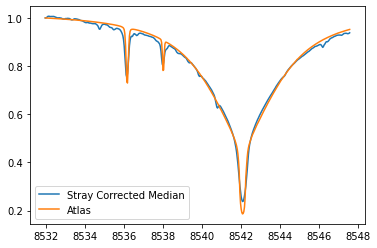

In [6]:
plt.plot(wave_ca, norm_median_stray, label='Stray Corrected Median')

plt.plot(wave_ca, norm_atlas, label='Atlas')

plt.legend()

In [7]:
synthesis_file_blend = base_path / 'CaII_with_blends_RH15D_mu_0p8.nc'

In [8]:
f2 = h5py.File(synthesis_file_blend, 'r')

In [9]:
norm_median_stray, norm_atlas_blend, atlas_wave = normalise_profiles(
    stray_corrected_median,
    wave_ca,
    f2['profiles'][0, 0, 0, :, 0],
    f1['wav'][()],
    cont_wave=wave_ca[0]
)

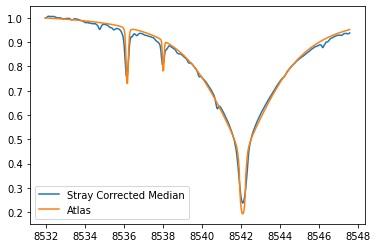

In [10]:
plt.plot(wave_ca, norm_median_stray, label='Stray Corrected Median')

plt.plot(wave_ca, norm_atlas_blend, label='Atlas')

plt.legend()

In [11]:
f1['wav'].shape

(464,)

In [12]:
fgauss =  h5py.File('/home/harsh/SpinorNagaraju/maps_1/stic/run_nagaraju/gaussian_broadening_6.42_km_per_sec_8p4_ma_sampling.h5', 'r')

In [13]:
fgauss.keys()

<KeysViewHDF5 ['iprof', 'wav']>

In [14]:
fgauss['iprof'].shape

(1859,)

In [17]:
fgauss.close()

In [16]:
ai.shape

(83,)

In [18]:
wave_ca.shape

(464,)

In [20]:
6.42 * 8542.09/ (2.99792458e5 * (wave_ca[1] - wave_ca[0]))

5.42328124262166

In [32]:
norm_atlas_blend_degrade = scipy.ndimage.gaussian_filter1d(norm_atlas_blend, sigma=1.9/2.355)

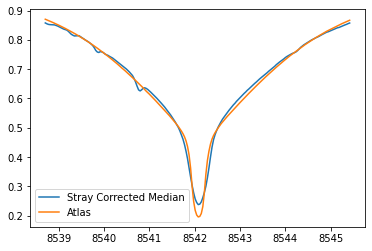

In [39]:
a = 200
b = 400
plt.plot(wave_ca[a:b], norm_median_stray[a:b], label='Stray Corrected Median')

plt.plot(wave_ca[a:b], norm_atlas_blend_degrade[a:b], label='Atlas')

plt.legend()